In [41]:
# Import modules
import pandas
from imdb import IMDb
import matplotlib.pyplot as plt

ia = IMDb()

# Reading in the data into a pandas dataframe
# Data from https://www.kaggle.com/mitesh58/bollywood-movie-dataset/version/4#
df = pandas.read_csv("./BollywoodMovieDetail.csv")

# Display the data
df


,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1
5,tt0238936,Devdas,2002,12 Jul 2002,Musical | Romance,Saratchandra Chatterjee (based on the novel by...,Shah Rukh Khan | Madhuri Dixit | Aishwarya Rai...,Sanjay Leela Bhansali,0.0,6
6,tt0247911,Aap Mujhe Achche Lagne Lage,2002,19 Apr 2002,Action | Drama | Romance,Robin Bhatt (story) | Girish Dhamija (dialogue...,Hrithik Roshan | Ameesha Patel | Kiran Kumar |...,Vikram Bhatt,0.0,2
7,tt0248126,Kabhi Khushi Kabhie Gham...,2001,14 Dec 2001,Drama | Musical | Romance,Karan Johar | Sheena Parikh (screenplay),Amitabh Bachchan | Jaya Bhaduri | Shah Rukh Kh...,Karan Johar,0.0,8
8,tt0248216,Na Tum Jaano Na Hum,2002,10 May 2002,Comedy | Drama | Musical,Pratibha Acharya (dialogue) | Arjun Sablok,Saif Ali Khan | Hrithik Roshan | Esha Deol | A...,Arjun Sablok,0.0,1
9,tt0248617,Yaadein...,2001,27 Jun 2001,Musical | Drama | Romance,Subhash Ghai (dialogue) | Subhash Ghai (screen...,Jackie Shroff | Hrithik Roshan | Kareena Kapoo...,Subhash Ghai,0.0,2


In [32]:
ia = IMDb()

# Getting additional information from imdb
ratings = []
votes = []
runtimes = []

# This will take a while
for idx, row in df.iterrows():
    print("Progress {:2.1%}".format(idx / df.shape[0]), end="\r")
    imdbid = str(row["imdbId"])[2:]
    movie = ia.get_movie(imdbid)
    ratings.append(movie.get("rating"))
    votes.append(movie.get("votes"))
    runtimes.append(movie.get("runtimes"))
    
# Add our new information to our dataframe
df["rating"] = ratings
df["votes"] = votes
df["runtimes"] = runtimes

# View our new dataframe
df


# Save our df so we don't have to keep running this
df.to_csv("our_data.csv")
    

In [54]:
ia = IMDb()
movie = ia.get_movie("3881136")
movie.keys()


['cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'directors',
 'writers',
 'producers',
 'composers',
 'cinematographers',
 'editors',
 'editorial department',
 'sound department',
 'visual effects',
 'music department',
 'miscellaneous',
 'akas',
 'writer',
 'director',
 'production companies',
 'plot',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']

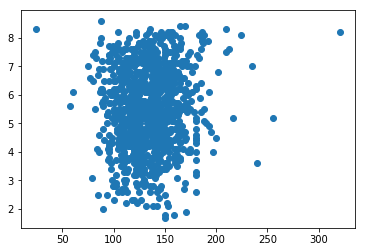

In [52]:
df = pandas.read_csv("our_data.csv")
df["runtimes"] = pandas.to_numeric(df["runtimes"])
df["votes"] = pandas.to_numeric(df["votes"])
df["rating"] = pandas.to_numeric(df["rating"])
plt.scatter(df["runtimes"], df["rating"])

df.to_csv("our_data.csv")